In [1]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.lines import Line2D


import json

In [2]:
results_base_dir = "results-appendix-15/"
# results_base_dir = "results_randseed_geo_only/"

In [3]:
# case_studies = [
#     "1h-none-noSUSD",
#     "1h-cheap-relaxedSUSD",
#     "1h-cheap-tightSUSD",
#     "1h-expensive-relaxedSUSD",
#     "1h-expensive-tightSUSD",
#     "2h-none-noSUSD",
#     "2h-cheap-relaxedSUSD",
#     "2h-cheap-tightSUSD",
#     "2h-expensive-relaxedSUSD",
#     "2h-expensive-tightSUSD",
#     "3h-none-noSUSD",
#     "3h-cheap-relaxedSUSD",
#     "3h-cheap-tightSUSD",
#     "3h-expensive-relaxedSUSD",
#     "3h-expensive-tightSUSD",
#     "4h-none-noSUSD",
#     "4h-cheap-relaxedSUSD",
#     "4h-cheap-tightSUSD",
#     "4h-expensive-relaxedSUSD",
#     "4h-expensive-tightSUSD",
#     "5h-none-noSUSD",
#     "5h-cheap-relaxedSUSD",
#     "5h-cheap-tightSUSD",
#     "5h-expensive-relaxedSUSD",
#     "5h-expensive-tightSUSD",
#     "geographical-none-noSUSD",
#     "geographical-cheap-relaxedSUSD",
#     "geographical-cheap-tightSUSD",
#     "geographical-expensive-relaxedSUSD",
#     "geographical-expensive-tightSUSD",
# ]

case_studies = [
    "1h-none-noSUSD",
    "1h-expensive-relaxedSUSD",
    "1h-expensive-tightSUSD",
    "2h-none-noSUSD",
    "2h-expensive-relaxedSUSD",
    "2h-expensive-tightSUSD",
    "3h-none-noSUSD",
    "3h-expensive-relaxedSUSD",
    "3h-expensive-tightSUSD",
    "4h-none-noSUSD",
    "4h-expensive-relaxedSUSD",
    "4h-expensive-tightSUSD",
    "5h-none-noSUSD",
    "5h-expensive-relaxedSUSD",
    "5h-expensive-tightSUSD",
    "geographical-none-noSUSD",
    "geographical-expensive-relaxedSUSD",
    "geographical-expensive-tightSUSD",
]

# case_studies = [
#     "geographical-none-noSUSD",
#     "geographical-cheap-relaxedSUSD",
#     "geographical-cheap-tightSUSD",
#     "geographical-expensive-relaxedSUSD",
#     "geographical-expensive-tightSUSD",
# ]

In [4]:
def pareto_front(points):
    is_pareto = np.ones(points.shape[0], dtype=bool)
    for i, c in enumerate(points):
        if is_pareto[i]:
            is_pareto[is_pareto] = np.any(points[is_pareto] < c, axis=1) | np.all(points[is_pareto] == c, axis=1)
            is_pareto[i] = True  # Keep current point
    return points[is_pareto]

In [5]:
# total_costs = []
# total_costs_nl = []
# op_costs_nl = []
# total_costs_non_nl = []
# op_costs_non_nl = []

# for case_study in case_studies:
#     with open(results_base_dir + case_study + "/" + "objective_value.txt", 'r') as file:
#         for line in file:
#             line_split = line.split(';')

#             total_costs.append(float(line_split[0]))
#             total_costs_nl.append(float(line_split[1]))
#             op_costs_nl.append(float(line_split[2]))
#             total_costs_non_nl.append(float(line_split[3]))
#             op_costs_non_nl.append(float(line_split[4]))


# # total_costs

In [6]:
total_costs = []
total_costs_nl = []
op_costs_nl = []
total_costs_non_nl = []
op_costs_non_nl = []

for case_study in case_studies:
    total_costs_temp = []
    total_costs_nl_temp = []
    with open(results_base_dir + case_study + "/" + "objective_value.txt", 'r') as file:
        for line in file:
            line_split = line.split(';')

            total_costs_temp.append(float(line_split[0]))
            total_costs_nl_temp.append(float(line_split[1]))
#             op_costs_nl.append(float(line_split[2]))
#             total_costs_non_nl.append(float(line_split[3]))
#             op_costs_non_nl.append(float(line_split[4]))

        total_costs.append(total_costs_temp)
        total_costs_nl.append(total_costs_nl_temp)


# total_costs

In [7]:
total_costs_np_array = np.array(total_costs)
total_costs_means = np.mean(total_costs_np_array, axis=1)

total_costs_nl_np_array = np.array(total_costs_nl)
total_costs_nl_means = np.mean(total_costs_nl_np_array, axis=1)

In [8]:
input_file = open ('output.json')
json_array = json.load(input_file)

stripped_data = json_array[1][0][1]['data']
run_model = stripped_data['run_model'][1]['data']
run_model_times = np.array([run_model[case_study][1]['times'] for case_study in case_studies])

run_model_means = np.mean(run_model_times, axis=1) / (1e9)
# run_model_means

In [9]:
expensive_case_studies = [x for x in case_studies if 'expensive' in x or 'none' in x]
expensive_case_studies_indices = [i for i in range(len(case_studies)) if case_studies[i] in expensive_case_studies]

print(expensive_case_studies_indices)

expensive_case_studies = np.array(case_studies)[expensive_case_studies_indices]
expensive_case_studies

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


array(['1h-none-noSUSD', '1h-expensive-relaxedSUSD',
       '1h-expensive-tightSUSD', '2h-none-noSUSD',
       '2h-expensive-relaxedSUSD', '2h-expensive-tightSUSD',
       '3h-none-noSUSD', '3h-expensive-relaxedSUSD',
       '3h-expensive-tightSUSD', '4h-none-noSUSD',
       '4h-expensive-relaxedSUSD', '4h-expensive-tightSUSD',
       '5h-none-noSUSD', '5h-expensive-relaxedSUSD',
       '5h-expensive-tightSUSD', 'geographical-none-noSUSD',
       'geographical-expensive-relaxedSUSD',
       'geographical-expensive-tightSUSD'], dtype='<U34')

### PLOT NO_SU/SD AND TIGHT AND RELAXED FOR EXPENSIVE CASE, AGAINST THEIR OBJECTIVE VALUES
### DO THE SAME FOR THE CHEAP CASE

### REPEAT BOTH FOR JUST NL COMPARED TO ENTIRE SYSTEM

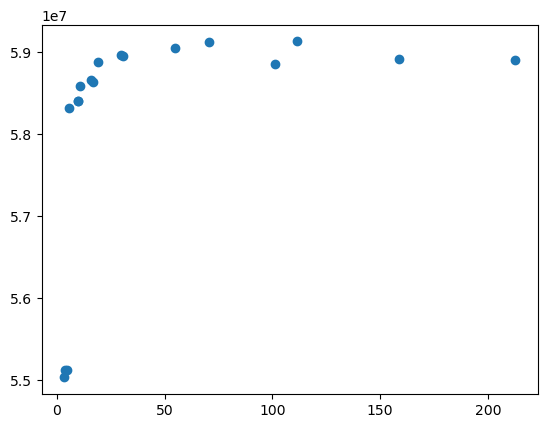

In [10]:
plt.scatter(run_model_means[expensive_case_studies_indices], np.array(total_costs)[expensive_case_studies_indices])

In [11]:
# economic_cases = ['none', 'cheap', 'expensive']
economic_cases = ['none', 'expensive']

temporal_resolutions = ['1h', '2h', '3h', '4h', '5h', 'geographical']
constraint_cases = ['none', 'tight', 'relaxed']

In [12]:
colours = ['red', 'blue', 'green', 'brown', 'pink', 'orange']

In [13]:
def plot_cost_vs_time(total_costs, title, economic_case='expensive', is_NL_only=False):
    
    plt.rcParams.update({'font.size': 10})
    
    fig, ax = plt.subplots()
    
    all_points = []
    
    all_points_with_geo = []

    for (temporal_res, colour) in zip(temporal_resolutions, colours):
        noSUSD_index = case_studies.index(f"{temporal_res}-none-noSUSD")
        tight_index = case_studies.index(f"{temporal_res}-{economic_case}-tightSUSD")
        relaxed_index = case_studies.index(f"{temporal_res}-{economic_case}-relaxedSUSD")

        ax.scatter(run_model_means[noSUSD_index], total_costs[noSUSD_index], color=colour, marker="o", s=80, edgecolors='black', linewidths=0.8, alpha=0.7)
        ax.scatter(run_model_means[tight_index], total_costs[tight_index], color=colour, marker="^", s=80, edgecolors='black', linewidths=0.8, alpha=0.7)
        ax.scatter(run_model_means[relaxed_index], total_costs[relaxed_index], color=colour, marker="X", s=80, edgecolors='black', linewidths=0.8, alpha=0.7)
        
        if is_NL_only:
            all_points_with_geo.append([run_model_means[noSUSD_index], total_costs[noSUSD_index]])
            all_points_with_geo.append([run_model_means[tight_index], total_costs[tight_index]])
            all_points_with_geo.append([run_model_means[relaxed_index], total_costs[relaxed_index]])
        
        if is_NL_only and 'geographical' in temporal_res:
            continue
        else:
            all_points.append([run_model_means[noSUSD_index], total_costs[noSUSD_index]])
            all_points.append([run_model_means[tight_index], total_costs[tight_index]])
            all_points.append([run_model_means[relaxed_index], total_costs[relaxed_index]])
        
    all_points = np.array(all_points)
    pareto_points = pareto_front(all_points)
    pareto_points = pareto_points[np.argsort(pareto_points[:, 0])]
    plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'r:.',linewidth=1, markersize=5, markerfacecolor="white", markeredgewidth=0,  label='Pareto Front')
    
    if is_NL_only:
        all_points_with_geo = np.array(all_points_with_geo)
        geo_pareto_points = pareto_front(all_points_with_geo)
        geo_pareto_points = geo_pareto_points[np.argsort(geo_pareto_points[:, 0])]
        plt.plot(geo_pareto_points[:, 0], geo_pareto_points[:, 1], 'b:.',linewidth=1, markersize=5, markerfacecolor="white", markeredgewidth=0,  label='Pareto Front')



    legend1 = ax.legend(handles=[
        Line2D([0], [0], marker='s', color='w', label='1h', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='2h', markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='3h', markerfacecolor='green', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='4h', markerfacecolor='brown', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='5h', markerfacecolor='pink', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='Geographical', markerfacecolor='orange', markersize=8),
    ], title='Temporal resolution', loc='center right')

    ax.add_artist(legend1)
    
    pareto_handle = Line2D(
        [0, 1, 2, 3], [0, 0, 0, 0],
        color='red',
        linestyle=':',
        marker='o',
        markerfacecolor='white',
        markeredgecolor='red',
        markeredgewidth=1,
        markersize=5,
        label= "Without geographical" if is_NL_only else None
    )
    
    legend2 = ax.legend(handles=[
        Line2D([0], [0], marker='o', color='w', label='No SU/SD costs', markerfacecolor='black', markersize=8),
        Line2D([0], [0], marker='X', color='w', label='Compact constraints', markerfacecolor='black', markersize=8),
        Line2D([0], [0], marker='^', color='w', label='Full constraints', markerfacecolor='black', markersize=8),
    ], title='SU/SD constraints', loc='upper right')
    
    ax.add_artist(legend2)
    
    
    
    pareto_front_label_handles = [pareto_handle]
    
    if is_NL_only:
        geo_pareto_handle = Line2D(
        [0, 1, 2, 3], [0, 0, 0, 0],
        color='blue',
        linestyle=':',
        marker='o',
        markerfacecolor='white',
        markeredgecolor='blue',
        markeredgewidth=1,
        markersize=5,
        label="With geographical"
    )
        pareto_front_label_handles.append(geo_pareto_handle)
        
    if is_NL_only:
        plt.rcParams.update({'font.size': 8})
    
    legend3 = ax.legend(handles=pareto_front_label_handles, title="Pareto front", loc="upper center")
    
    plt.rcParams.update({'font.size': 10})
    
    plt.title(title)
    plt.xlabel("Computation time [s]")
    plt.ylabel("Absolute percentage error")

    plt.tight_layout()
    plt.show()

In [ ]:
# plot_cost_vs_time(total_costs_errors, "ACTUAL PARETO FRONT, TOTAL, EXPENSIVE", is_NL_only=False)

In [ ]:
plot_cost_vs_time(total_costs, "Total cost expensive")

In [ ]:
plot_cost_vs_time(total_costs_nl, "NL cost expensive")

In [ ]:
plot_cost_vs_time(op_costs_nl, "NL cost operational expensive")

In [ ]:
total_costs

In [ ]:
diff_total_tight_expensive = []
diff_total_relaxed_expensive = []

diff_total_tight_cheap = []
diff_total_relaxed_cheap = []

diff_nl_tight_expensive = []
diff_nl_relaxed_expensive = []

diff_nl_tight_cheap = []
diff_nl_relaxed_cheap = []

In [ ]:
for temporal_res in temporal_resolutions:
    noSUSD_index = case_studies.index(f"{temporal_res}-none-noSUSD")
    tight_index = case_studies.index(f"{temporal_res}-expensive-tightSUSD")
    relaxed_index = case_studies.index(f"{temporal_res}-expensive-relaxedSUSD")
    
    diff_total_tight_expensive.append(100 * (total_costs_means[tight_index] - total_costs_means[noSUSD_index]) / total_costs_means[noSUSD_index])
    diff_total_relaxed_expensive.append(100 * (total_costs_means[relaxed_index] - total_costs_means[noSUSD_index]) / total_costs_means[noSUSD_index])
    
    diff_nl_tight_expensive.append(100 * (total_costs_nl_means[tight_index] - total_costs_nl_means[noSUSD_index]) / total_costs_nl_means[noSUSD_index])
    diff_nl_relaxed_expensive.append(100 * (total_costs_nl_means[relaxed_index] - total_costs_nl_means[noSUSD_index]) / total_costs_nl_means[noSUSD_index])
    
#     noSUSD_index = case_studies.index(f"{temporal_res}-none-noSUSD")
#     tight_index = case_studies.index(f"{temporal_res}-cheap-tightSUSD")
#     relaxed_index = case_studies.index(f"{temporal_res}-cheap-relaxedSUSD")
    
#     diff_total_tight_cheap.append(100 * (total_costs[tight_index] - total_costs[noSUSD_index]) / total_costs[noSUSD_index])
#     diff_total_relaxed_cheap.append(100 * (total_costs[relaxed_index] - total_costs[noSUSD_index]) / total_costs[noSUSD_index])
    
#     diff_nl_tight_cheap.append(100 * (total_costs_nl[tight_index] - total_costs_nl[noSUSD_index]) / total_costs_nl[noSUSD_index])
#     diff_nl_relaxed_cheap.append(100 * (total_costs_nl[relaxed_index] - total_costs_nl[noSUSD_index]) / total_costs_nl[noSUSD_index])

In [ ]:
plt.scatter(temporal_resolutions, diff_total_tight_expensive)
plt.title("Percentage difference between case without SU/SD and with Tight SU/SD, expensive case, per temporal resolution")

plt.scatter(temporal_resolutions, diff_total_tight_cheap)
# plt.scatter(temporal_resolutions, diff_total_relaxed_expensive)
# plt.scatter(temporal_resolutions, diff_total_relaxed_cheap)

In [ ]:
diff_total_tight_expensive

In [ ]:
plt.scatter(temporal_resolutions, diff_total_relaxed_expensive)
plt.title("Percentage difference between case without SU/SD and with Relaxed SU/SD, expensive case, per temporal resolution")

plt.scatter(temporal_resolutions, diff_total_tight_cheap)

In [ ]:
diff_1h_total_tight_expensive = []
diff_1h_total_relaxed_expensive = []

diff_1h_total_tight_cheap = []
diff_1h_total_relaxed_cheap = []

In [ ]:
for temporal_res in temporal_resolutions:
    noSUSD_index = case_studies.index("1h-none-noSUSD")
    tight_index = case_studies.index(f"{temporal_res}-expensive-tightSUSD")
    relaxed_index = case_studies.index(f"{temporal_res}-expensive-relaxedSUSD")
    
    diff_1h_total_tight_expensive.append(100 * (total_costs[tight_index] - total_costs[noSUSD_index]) / total_costs[noSUSD_index])
    diff_1h_total_relaxed_expensive.append(100 * (total_costs[relaxed_index] - total_costs[noSUSD_index]) / total_costs[noSUSD_index])
    
    noSUSD_index = case_studies.index("1h-none-noSUSD")
    tight_index = case_studies.index(f"{temporal_res}-cheap-tightSUSD")
    relaxed_index = case_studies.index(f"{temporal_res}-cheap-relaxedSUSD")
    
    diff_1h_total_tight_cheap.append(100 * (total_costs[tight_index] - total_costs[noSUSD_index]) / total_costs[noSUSD_index])
    diff_1h_total_relaxed_cheap.append(100 * (total_costs[relaxed_index] - total_costs[noSUSD_index]) / total_costs[noSUSD_index])

In [ ]:
plt.scatter(temporal_resolutions, diff_1h_total_tight_expensive)
plt.title("Percentage difference between 1h case with no su/sd and different resolutions with Tight SU/SD, expensive case, per temporal resolution")

plt.scatter(temporal_resolutions, diff_1h_total_tight_cheap)

In [ ]:
diff_1h_total_tight_expensive

In [ ]:
plt.scatter(temporal_resolutions, diff_nl_relaxed_expensive)
plt.title("Percentage difference between case without SU/SD and with Tight SU/SD, expensive case, per temporal resolution, NL ONLY")

plt.scatter(temporal_resolutions, diff_nl_relaxed_cheap)

In [ ]:
plt.scatter(temporal_resolutions, diff_total_relaxed_expensive, label="RELAXED")
# plt.title("Percentage difference between case without SU/SD and with Tight SU/SD, expensive case, per temporal resolution, NL ONLY")

# plt.scatter(temporal_resolutions, diff_total_relaxed_cheap)

plt.scatter(temporal_resolutions, diff_total_tight_expensive)
# plt.title("Percentage difference between case without SU/SD and with Tight SU/SD, expensive case, per temporal resolution, NL ONLY")

# plt.scatter(temporal_resolutions, diff_total_tight_cheap)

plt.legend()

In [ ]:
diff_1h_nl_tight_expensive = []
diff_1h_nl_relaxed_expensive = []

diff_1h_nl_tight_cheap = []
diff_1h_nl_relaxed_cheap = []

In [ ]:
for temporal_res in temporal_resolutions:
    noSUSD_index = case_studies.index("1h-none-noSUSD")
    tight_index = case_studies.index(f"{temporal_res}-expensive-tightSUSD")
    relaxed_index = case_studies.index(f"{temporal_res}-expensive-relaxedSUSD")
    
    diff_1h_total_tight_expensive.append(100 * (total_costs_nl[tight_index] - total_costs_nl[noSUSD_index]) / total_costs_nl[noSUSD_index])
    diff_1h_total_relaxed_expensive.append(100 * (total_costs_nl[relaxed_index] - total_costs_nl[noSUSD_index]) / total_costs_nl[noSUSD_index])
    
    noSUSD_index = case_studies.index("1h-none-noSUSD")
    tight_index = case_studies.index(f"{temporal_res}-cheap-tightSUSD")
    relaxed_index = case_studies.index(f"{temporal_res}-cheap-relaxedSUSD")
    
    diff_1h_total_tight_cheap.append(100 * (total_costs_nl[tight_index] - total_costs_nl[noSUSD_index]) / total_costs_nl[noSUSD_index])
    diff_1h_total_relaxed_cheap.append(100 * (total_costs_nl[relaxed_index] - total_costs_nl[noSUSD_index]) / total_costs_nl[noSUSD_index])

In [ ]:
plt.scatter(temporal_resolutions, diff_nl_relaxed_expensive, label="RELAXED")
# plt.title("Percentage difference between case without SU/SD and with Tight SU/SD, expensive case, per temporal resolution, NL ONLY")

# plt.scatter(temporal_resolutions, diff_total_relaxed_cheap)

plt.scatter(temporal_resolutions, diff_nl_tight_expensive)
# plt.title("Percentage difference between case without SU/SD and with Tight SU/SD, expensive case, per temporal resolution, NL ONLY")

# plt.scatter(temporal_resolutions, diff_total_tight_cheap)

plt.legend()

In [ ]:
total_costs

In [ ]:
expensive_case_studies = [x for x in case_studies if 'expensive' in x or 'none' in x]
expensive_case_studies_indices = [i for i in range(len(case_studies)) if case_studies[i] in expensive_case_studies]

print(expensive_case_studies_indices)

expensive_case_studies = np.array(case_studies)[expensive_case_studies_indices]
expensive_case_studies

In [ ]:
total_costs_np_arr = np.array(total_costs)

In [ ]:
total_costs_np_arr

In [ ]:
total_costs_errors = np.abs((total_costs_np_arr - total_costs_np_arr[4]) * 100 / total_costs_np_arr[4])

In [ ]:
total_costs_errors

In [ ]:
total_costs_errors = np.abs((total_costs_np_arr - total_costs_np_arr[4]) * 100 / total_costs_np_arr[4])
plot_cost_vs_time(total_costs_errors, "Computation time (seconds) VS absolute percentage error compared to \n the 1 hour resolution with full constraints, for the entire system, in the expensive case")

In [ ]:
total_costs_errors = np.abs((total_costs_np_arr - total_costs_np_arr[2]) * 100 / total_costs_np_arr[2])
plot_cost_vs_time(total_costs_errors, "Computation time (seconds) VS absolute percentage error compared to \n the 1 hour resolution with full constraints, for the entire system, in the cheap case", 'cheap')

In [ ]:
total_costs_nl_np_arr = np.array(total_costs_nl)
total_costs_nl_errors = np.abs((total_costs_nl_np_arr - total_costs_nl_np_arr[4]) * 100 / total_costs_nl_np_arr[4])
plot_cost_vs_time(total_costs_nl_errors, "Computation time (seconds) VS absolute percentage error compared to \n the 1 hour resolution with full constraints, for the Netherlands only, in the expensive case", is_NL_only=True)

In [ ]:
total_costs_nl_np_arr = np.array(total_costs_nl)
total_costs_nl_errors = np.abs((total_costs_nl_np_arr - total_costs_nl_np_arr[2]) * 100 / total_costs_nl_np_arr[2])
plot_cost_vs_time(total_costs_nl_errors, "Computation time (seconds) VS absolute percentage error compared to \n the 1 hour resolution with full constraints, for the Netherlands only, in the cheap case", 'cheap', is_NL_only=True)

In [ ]:
total_costs_nl

In [ ]:
A = np.array(total_costs_nl)

In [ ]:
E = (A - total_costs_nl[0]) * 100 / total_costs_nl[0]

In [ ]:
E

In [ ]:
total_costs

In [ ]:
total_costs[3]

In [ ]:
total_costs[4]

# WITH AVG COSTS

ValueError: '1h-cheap-tightSUSD' is not in list

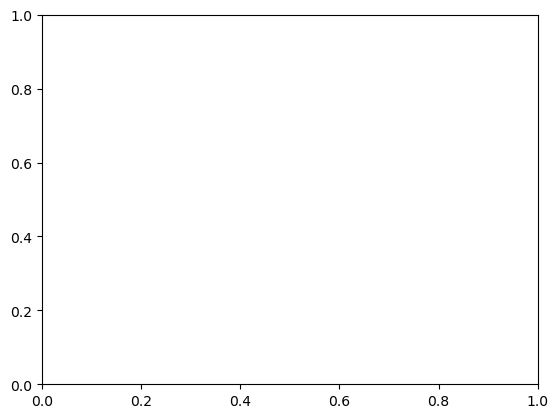

In [14]:
total_costs_nl_np_arr = np.array(total_costs_nl_means)
total_costs_nl_errors = np.abs((total_costs_nl_np_arr - total_costs_nl_np_arr[2]) * 100 / total_costs_nl_np_arr[2])
plot_cost_vs_time(total_costs_nl_errors, "Computation time (seconds) VS absolute percentage error compared to \n the 1 hour resolution with full constraints, for the Netherlands only, in the cheap case", 'cheap', is_NL_only=True)

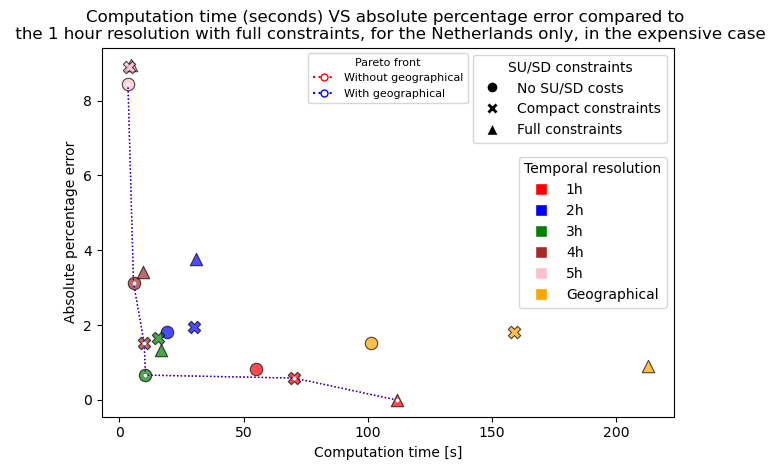

In [16]:
total_costs_nl_np_arr = np.array(total_costs_nl_means)
total_costs_nl_errors = np.abs((total_costs_nl_np_arr - total_costs_nl_np_arr[2]) * 100 / total_costs_nl_np_arr[2])
plot_cost_vs_time(total_costs_nl_errors, "Computation time (seconds) VS absolute percentage error compared to \n the 1 hour resolution with full constraints, for the Netherlands only, in the expensive case", is_NL_only=True)

ValueError: '1h-cheap-tightSUSD' is not in list

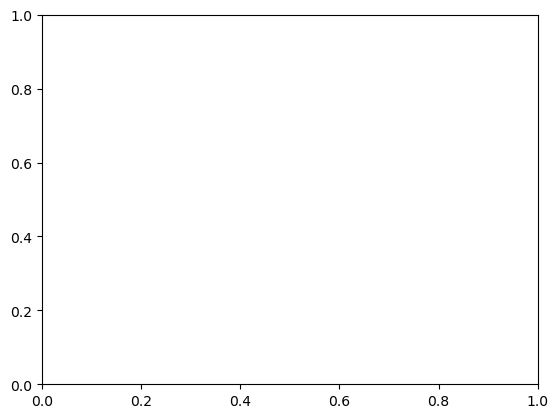

In [17]:
total_costs_errors = np.abs((total_costs_means - total_costs_means[2]) * 100 / total_costs_means[2])
plot_cost_vs_time(total_costs_errors, "Computation time (seconds) VS absolute percentage error compared to \n the 1 hour resolution with full constraints, for the entire system, in the cheap case", 'cheap')

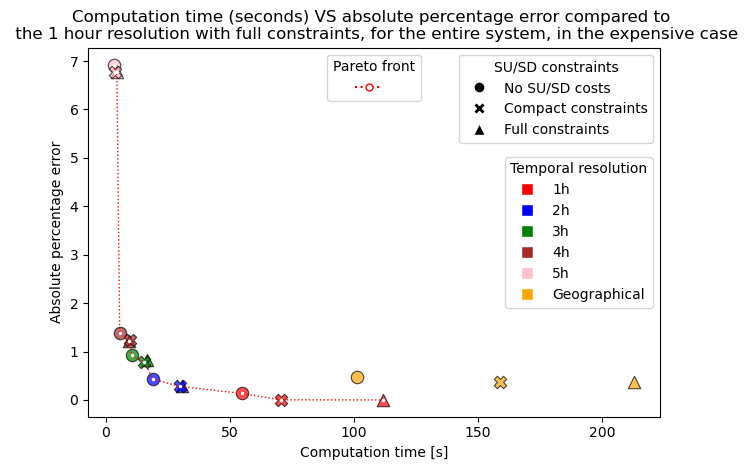

In [18]:
total_costs_errors = np.abs((total_costs_means - total_costs_means[2]) * 100 / total_costs_means[2])
plot_cost_vs_time(total_costs_errors, "Computation time (seconds) VS absolute percentage error compared to \n the 1 hour resolution with full constraints, for the entire system, in the expensive case")

In [ ]:
total_costs_errors

In [ ]:
total_costs_errors = np.abs((total_costs_means - total_costs_means[2]) * 100 / total_costs_means[2])
total_costs_errors[-5]

In [ ]:
total_costs_nl_errors = np.abs((total_costs_nl_np_arr - total_costs_nl_np_arr[4]) * 100 / total_costs_nl_np_arr[4])
total_costs_nl_errors[-5]